<a href="https://colab.research.google.com/github/srikantharun/SSLV-Using-Florence-2/blob/main/Multimodal_Analysis_SSLV_Florence2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal Analysis of Spacetech Designs for SSLV Using Florence-2

This Jupyter Notebook demonstrates multimodal analysis of Small Satellite Launch Vehicle (SSLV) designs using **Florence-2**, a state-of-the-art vision-language model released by Microsoft in January 2025. The demo is tailored for spacetech applications, focusing on Tamil Nadu's growing spacetech ecosystem (e.g., startups like Agnikul Cosmos, ToSpace). We perform tasks such as:
- **Image Captioning**: Describe SSLV components.
- **Object Detection**: Identify parts like nozzles or fairings.
- **Segmentation**: Isolate components for quality control.
- **Visual Question Answering (VQA)**: Answer design-related questions.

## Objectives
- Showcase Florence-2's capabilities in spacetech design analysis.
- Integrate OpenCV for image processing and PyTorch for model inference.
- If required we could use datasets like SPEED+ instead of synthetic SSLV images.
- Address practical problems: quality control, mission planning, design validation.

## Prerequisites
- Python 3.8+
- Libraries: `torch`, `transformers`, `opencv-python`, `diffusers`, `datasets`, `PIL`
- GPU recommended (e.g., Google Colab Pro or local NVIDIA GPU)
- Hugging Face account and token for gated models

## Datasets
- **Synthetic SSLV Images**: Generated using Stable Diffusion 3.5 with prompts like "SSLV rocket nozzle in space".
- Optional: Public satellite imagery (e.g., NASA's Earth Observatory) for context.

## Setup
Install dependencies and authenticate with Hugging Face.

In [3]:
!pip install torch torchvision opencv-python transformers diffusers datasets pillow
from huggingface_hub import login
from google.colab import userdata
login(userdata.get('alpha-hf-token'))
import torch
import cv2
import numpy as np
from PIL import Image
import requests
from transformers import AutoProcessor, AutoModelForCausalLM
from diffusers import StableDiffusionPipeline
from datasets import load_dataset
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Florence-2 Model
Florence-2 is a lightweight vision-language model trained on the FLD-5B dataset (126M images, 5.4B annotations). It supports tasks like captioning, detection, segmentation, and VQA using a prompt-based approach.

In [5]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Florence-2-large",
    torch_dtype=torch_dtype,
    trust_remote_code=True
).to(device)
processor = AutoProcessor.from_pretrained(
    "microsoft/Florence-2-large",
    trust_remote_code=True
)

config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Stable Diffusion 3.5 is a complex model with multiple modules:

- vae: Variational Autoencoder for image encoding/decoding.
- unet: U-Net for denoising during image generation.
- text_encoder: Encodes text prompts (e.g., CLIP).
- tokenizer: Processes text inputs.
- scheduler: Controls denoising steps.
- image_encoder, feature_extractor, safety_checker: Optional for specific pipelines or safety checks, often not required for basic text-to-image tasks.

In [2]:
!pip install diffusers --upgrade
import diffusers
print(diffusers.__version__)

0.33.1


### Adding Permission To Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Generate Synthetic SSLV Images
Since real SSLV images are limited, we use **CompVis/stable-diffusion-v1-4** to generate synthetic images of SSLV components (e.g., rocket nozzle, fairing). This simulates designs for analysis.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 MB 10.8 MB/s eta 0:00:00
Mounted at /content/drive


Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

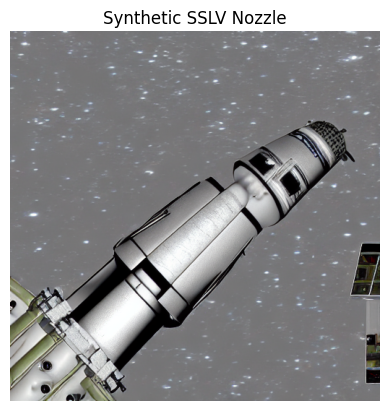

In [9]:
# Cell: Setup and Generate Synthetic SSLV Images
# All comments in English

# Install dependencies
!pip install torch torchvision opencv-python transformers diffusers>=0.25.0 datasets pillow
!pip install huggingface_hub[hf_xet]

# Authenticate Hugging Face
from huggingface_hub import login
from google.colab import userdata
login(userdata.get('alpha-hf-token'))

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!mkdir -p /content/drive/MyDrive/SSLV_Demo


# Import libraries
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Device and dtype setup
device = "cuda" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

from diffusers import StableDiffusionPipeline
from transformers import AutoTokenizer, AutoFeatureExtractor
from diffusers import AutoencoderKL, UNet2DConditionModel, DDIMScheduler
from diffusers.pipelines.stable_diffusion.safety_checker import StableDiffusionSafetyChecker

# Load CompVis/stable-diffusion-v1-4
try:
    pipe = StableDiffusionPipeline.from_pretrained(
        "CompVis/stable-diffusion-v1-4",
        torch_dtype=torch_dtype,
        use_auth_token=True,
        revision="fp16" if torch.cuda.is_available() else "main",  # Use float16 on GPU to save memory
        safety_checker=None,  # Disable safety checker
        requires_safety_checker=False
    ).to(device)
except Exception as e:
    print(f"Error loading pipeline: {e}")
    raise

# Optimize memory
if torch.cuda.is_available():
    pipe.enable_model_cpu_offload()  # Offload to CPU
    pipe.enable_sequential_cpu_offload()  # Sequential processing
    pipe.enable_attention_slicing()  # Reduce memory for attention

# Generate image
prompt = "A detailed SSLV rocket nozzle in space, high-resolution, realistic, with metallic texture"
try:
    image = pipe(
        prompt,
        num_inference_steps=50,
        guidance_scale=7.5,
        height=512,
        width=512
    ).images[0]
    image.save("/content/drive/MyDrive/SSLV_Demo/sslv_nozzle.png")
except Exception as e:
    print(f"Error generating image: {e}")
    raise

# Display image
plt.imshow(image)
plt.axis('off')
plt.title("Synthetic SSLV Nozzle")
plt.show()

## 3. Load SPEED+ Dataset
The SPEED+ dataset contains synthetic and hardware-in-the-loop images of spacecraft, suitable for SSLV component analysis. We load a sample image for demonstration.

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

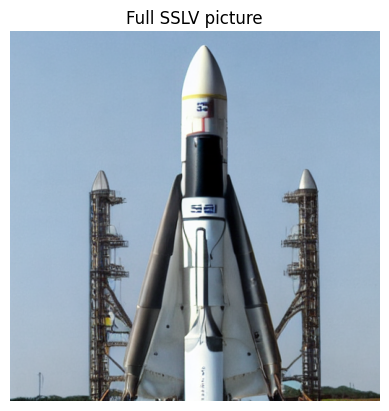

In [18]:
from diffusers import StableDiffusionPipeline
from transformers import AutoTokenizer, AutoFeatureExtractor
from diffusers import AutoencoderKL, UNet2DConditionModel, DDIMScheduler
from diffusers.pipelines.stable_diffusion.safety_checker import StableDiffusionSafetyChecker

# Load CompVis/stable-diffusion-v1-4
try:
    pipe = StableDiffusionPipeline.from_pretrained(
        "CompVis/stable-diffusion-v1-4",
        torch_dtype=torch_dtype,
        use_auth_token=True,
        revision="fp16" if torch.cuda.is_available() else "main",  # Use float16 on GPU to save memory
        safety_checker=None,  # Disable safety checker
        requires_safety_checker=False
    ).to(device)
except Exception as e:
    print(f"Error loading pipeline: {e}")
    raise

# Generate image
prompt = "Side view of SSLV rocket on launch pad, showing rocket nozzle, stabilizing fins, nose cone, payload section. Sharp details, clean background, labeled structure"

try:
    image = pipe(
        prompt,
        num_inference_steps=50,
        guidance_scale=7.5,
        height=512,
        width=512
    ).images[0]
    image.save("/content/drive/MyDrive/SSLV_Demo/sslv_full.png")
except Exception as e:
    print(f"Error generating image: {e}")
    raise

# Display image
plt.imshow(image)
plt.axis('off')
plt.title("Full SSLV picture")
plt.show()


## 4. Multimodal Analysis with Florence-2
We perform four tasks to analyze SSLV designs:
- **Image Captioning**: Describe the component.
- **Object Detection**: Identify parts like nozzles or panels.
- **Segmentation**: Isolate components for quality control.
- **VQA**: Answer design-related questions.

### Helper Function
Define a function to run Florence-2 tasks.

In [21]:
from transformers import AutoProcessor
model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-base", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-base", trust_remote_code=True)

def run_florence_task(image, task_prompt, text_input=None):
    prompt = task_prompt if text_input is None else task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device, torch_dtype)
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )
    return parsed_answer

# Convert PIL Image to OpenCV format for visualization
def pil_to_cv2(image):
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

### 4.1 Image Captioning
Generate a description of the SSLV nozzle.

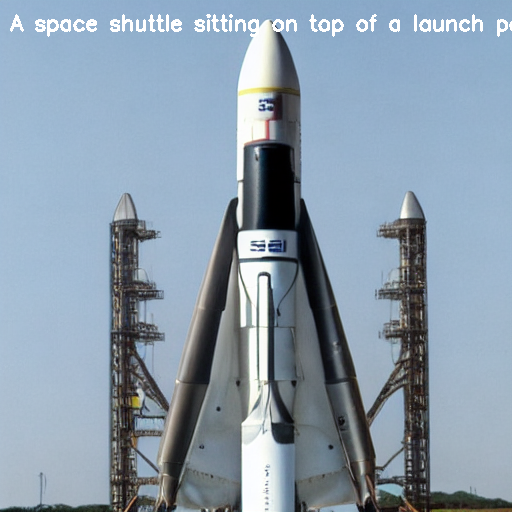

Caption: A space shuttle sitting on top of a launch pad.


In [23]:
from google.colab.patches import cv2_imshow
try:
        # Load image
        sslv_image = Image.open("/content/drive/MyDrive/SSLV_Demo/sslv_full.png")
        if sslv_image.mode != "RGB":
            sslv_image = sslv_image.convert("RGB")

        # Generate caption
        caption = run_florence_task(sslv_image, "<CAPTION>")

        # Extract caption string from dictionary
        if isinstance(caption, dict) and "<CAPTION>" in caption:
            caption_text = caption["<CAPTION>"]
        else:
            raise ValueError("Unexpected caption format: expected a dict with '<CAPTION>' key")

        # Convert PIL image to OpenCV format (RGB to BGR)
        cv_sslv_image = cv2.cvtColor(np.array(sslv_image), cv2.COLOR_RGB2BGR)

        # Overlay caption on image using cv2.putText
        cv2.putText(
            img=cv_sslv_image,
            text=caption_text,
            org=(10, 30),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.7,
            color=(255, 255, 255),
            thickness=2
        )

        # Display the image
        #cv2.imshow("Captioned Image", cv_sslv_image)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        cv2_imshow(cv_sslv_image)
        print(f"Caption: {caption_text}")

except Exception as e:
        print(f"Error in main: {str(e)}")

### 4.2 Object Detection
Detect components like the nozzle or structural elements.

Detected Objects: {'<OD>': {'bboxes': [[153.8560028076172, 18.68800163269043, 382.2080078125, 511.2320251464844]], 'labels': ['rocket']}}


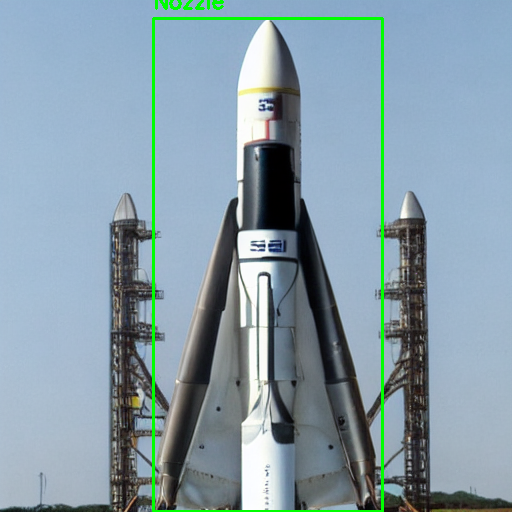

In [24]:
#detection = run_florence_task(sslv_image, "<OD>", "rocket nozzle, structural frame")
sslv_image = Image.open("/content/drive/MyDrive/SSLV_Demo/sslv_full.png")
detection = run_florence_task(sslv_image, "<OD>")
print("Detected Objects:", detection)

# Visualize bounding boxes
cv_image = pil_to_cv2(sslv_image)
for box in detection['<OD>']['bboxes']:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(cv_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(cv_image, "Nozzle", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

#cv2.imshow("Object Detection", cv_image)
cv2_imshow(cv_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Image dimensions: 512x512
DENSE REGION CAPTIONS: </s><s>A close-up of a silver and black rocket with a blue stripe on the side.<loc_174><loc_38><loc_905><loc_998></s>
Region 174: 
Region 38: 
Region 905: 
Region 998: </s>
Component nose cone not found in captions, using manual approximation.
Component payload section not found in captions, using manual approximation.
Component rocket nozzle not found in captions, using manual approximation.
Component stabilizing fins not found in captions, using manual approximation.
DETECTED ROI for nose cone: [177, 0, 332, 85]


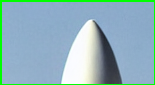

DETECTED ROI for payload section: [177, 85, 332, 170]


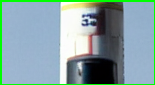

DETECTED ROI for rocket nozzle: [177, 409, 332, 512]


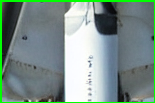

DETECTED ROI for stabilizing fins: [138, 409, 371, 512]


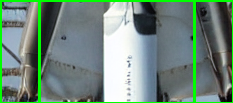

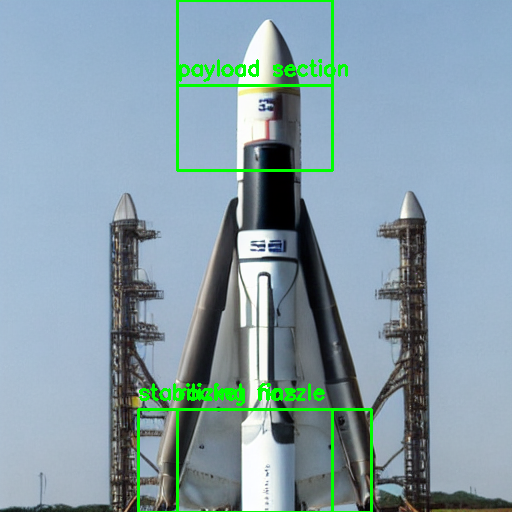

In [25]:
# Import necessary libraries
import cv2
import torch
from transformers import AutoModelForCausalLM, AutoProcessor
import numpy as np
from google.colab.patches import cv2_imshow

# Ensure the model and processor are loaded
device = "cuda" if torch.cuda.is_available() else "cpu"


# Load the SSLV rocket image
sslv_image_path = "/content/drive/MyDrive/SSLV_Demo/sslv_full.png"
sslv_image = cv2.imread(sslv_image_path)
if sslv_image is None:
    raise FileNotFoundError(f"Image not found at {sslv_image_path}")

# Get image dimensions
height, width, _ = sslv_image.shape
print(f"Image dimensions: {width}x{height}")

# Step 1: Enlarge the rocket's ROI to exclude towers
rocket_roi = [100, 0, 410, height]  # Approximate ROI for the rocket (excluding towers)
x1_r, y1_r, x2_r, y2_r = rocket_roi
rocket_image = sslv_image[y1_r:y2_r, x1_r:x2_r]
if rocket_image.size == 0:
    raise ValueError("Rocket ROI is empty, adjust coordinates.")

# Step 2: Use Dense Region Captioning on the cropped image
task_prompt = "<DENSE_REGION_CAPTION>"
inputs = processor(
    text=task_prompt,
    images=rocket_image,
    return_tensors="pt",
    padding=True
).to(device)

with torch.no_grad():
    outputs = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_length=1024,
        num_beams=3,
        do_sample=False,
        early_stopping=True
    )

# Post-process the output
region_captions = processor.batch_decode(outputs, skip_special_tokens=False)[0]
print("DENSE REGION CAPTIONS:", region_captions)

# Step 3: Parse region captions and approximate bounding boxes
components = {
    "nose cone": None,
    "payload section": None,
    "rocket nozzle": None,
    "stabilizing fins": None
}

# Adjust for cropped image dimensions
crop_height, crop_width, _ = rocket_image.shape

for loc in region_captions.split("<loc_")[1:]:
    loc_end = loc.find(">")
    if loc_end == -1:
        continue
    loc_id = loc[:loc_end]
    caption = loc[loc_end+1:].strip()
    print(f"Region {loc_id}: {caption}")

    # Match captions to components and approximate ROIs in cropped coordinates
    if "nose cone" in caption.lower():
        components["nose cone"] = [crop_width//4, 0, 3*crop_width//4, crop_height//6]  # Top ~15%
    elif "payload" in caption.lower():
        components["payload section"] = [crop_width//4, crop_height//6, 3*crop_width//4, crop_height//3]  # Next ~15%
    elif "nozzle" in caption.lower():
        components["rocket nozzle"] = [crop_width//4, 4*crop_height//5, 3*crop_width//4, crop_height]  # Bottom ~20%
    elif "fins" in caption.lower():
        components["stabilizing fins"] = [crop_width//8, 4*crop_height//5, 7*crop_width//8, crop_height]  # Bottom ~20%, wider for fins

# Step 4: Fallback to manual approximation if components are not found
for component in components:
    if components[component] is None:
        print(f"Component {component} not found in captions, using manual approximation.")
        if component == "nose cone":
            components["nose cone"] = [crop_width//4, 0, 3*crop_width//4, crop_height//6]
        elif component == "payload section":
            components["payload section"] = [crop_width//4, crop_height//6, 3*crop_width//4, crop_height//3]
        elif component == "rocket nozzle":
            components["rocket nozzle"] = [crop_width//4, 4*crop_height//5, 3*crop_width//4, crop_height]
        elif component == "stabilizing fins":
            components["stabilizing fins"] = [crop_width//8, 4*crop_height//5, 7*crop_width//8, crop_height]

# Step 5: Map cropped coordinates back to original image and draw bounding boxes
for component, bbox in components.items():
    x1_c, y1_c, x2_c, y2_c = bbox
    # Map back to original image coordinates
    x1 = x1_c + x1_r
    y1 = y1_c + y1_r
    x2 = x2_c + x1_r
    y2 = y2_c + y1_r

    # Validate bounding box coordinates
    if x1 < 0 or x2 > width or y1 < 0 or y2 > height or x1 >= x2 or y1 >= y2:
        print(f"Invalid bounding box for {component}: [{x1}, {y1}, {x2}, {y2}]")
        continue

    # Draw bounding box and label
    cv2.rectangle(sslv_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(sslv_image, component, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    print(f"DETECTED ROI for {component}: [{x1}, {y1}, {x2}, {y2}]")

    # Extract and display ROI
    roi = sslv_image[y1:y2, x1:x2]
    if roi.size > 0:
        cv2_imshow(roi)
    else:
        print(f"ROI for {component} is empty, skipping display.")

# Show image with all bounding boxes
cv2_imshow(sslv_image)
cv2.destroyAllWindows()

### 4.3 Segmentation
Segment the nozzle for quality control (e.g., defect detection).

Cropped image dimensions: 310x512
Segmentation mask created for: nose cone -> [77, 0, 232, 85]
Segmentation mask created for: payload section -> [77, 85, 232, 170]
Segmentation mask created for: rocket nozzle -> [77, 409, 232, 512]
Segmentation mask created for: stabilizing fins -> [38, 409, 271, 512]


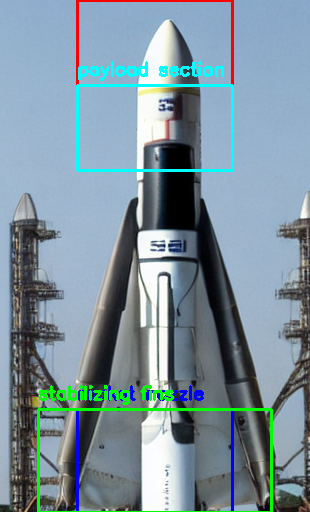

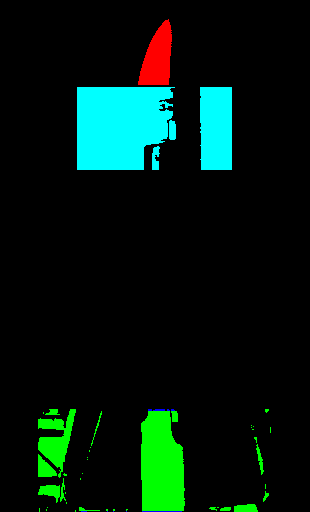

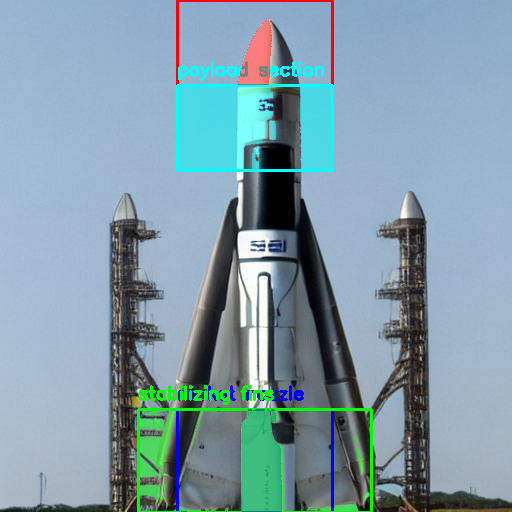

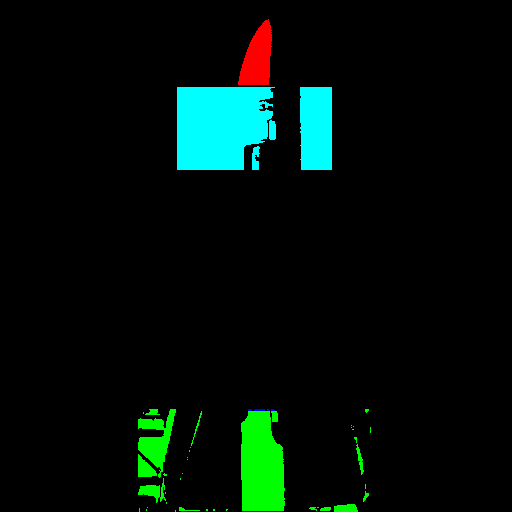

In [28]:
# Import necessary libraries
import cv2
import torch
from transformers import AutoModelForCausalLM, AutoProcessor
import numpy as np
from google.colab.patches import cv2_imshow


model.eval()

# Load the SSLV rocket image
sslv_image_path = "/content/drive/MyDrive/SSLV_Demo/sslv_full.png"
full_image = cv2.imread(sslv_image_path)
if full_image is None:
    raise FileNotFoundError(f"Image not found at {sslv_image_path}")

# Define a larger ROI to include the entire rocket
x1_roi, y1_roi, x2_roi, y2_roi = 100, 0, 410, 512
sslv_image = full_image[y1_roi:y2_roi, x1_roi:x2_roi]

# Get dimensions of the cropped image
height, width, _ = sslv_image.shape
print(f"Cropped image dimensions: {width}x{height}")

# Use previously detected ROIs (mapped to cropped coordinates)
components = {
    "nose cone": [177, 0, 332, 85],
    "payload section": [177, 85, 332, 170],
    "rocket nozzle": [177, 409, 332, 512],
    "stabilizing fins": [138, 409, 371, 512]
}

# Adjust ROIs for cropped coordinates
components_cropped = {}
for component, (x1, y1, x2, y2) in components.items():
    x1_c = x1 - x1_roi
    y1_c = y1 - y1_roi
    x2_c = x2 - x1_roi
    y2_c = y2 - y1_roi
    if x1_c < 0 or x2_c > width or y1_c < 0 or y2_c > height or x1_c >= x2_c or y1_c >= y2_c:
        print(f"Invalid ROI for {component} in cropped image: [{x1_c}, {y1_c}, {x2_c}, {y2_c}]")
        continue
    components_cropped[component] = [x1_c, y1_c, x2_c, y2_c]

# Prepare segmentation masks
masks = {component: np.zeros((height, width), dtype=np.uint8) for component in components_cropped}
colors = {
    "rocket nozzle": (255, 0, 0),    # Red
    "stabilizing fins": (0, 255, 0), # Green
    "nose cone": (0, 0, 255),        # Blue
    "payload section": (255, 255, 0) # Yellow
}

# Create initial segmentation masks and refine them using contours
for component, (x1, y1, x2, y2) in components_cropped.items():
    # Extract the ROI from the image
    roi = sslv_image[y1:y2, x1:x2]
    if roi.size == 0:
        print(f"ROI for {component} is empty, skipping.")
        continue

    # Convert ROI to grayscale and apply thresholding to create a binary mask
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print(f"No contours found for {component}, using rectangular mask.")
        masks[component][y1:y2, x1:x2] = 255
    else:
        # Create a blank mask for the ROI
        roi_mask = np.zeros_like(thresh)
        cv2.drawContours(roi_mask, contours, -1, 255, thickness=cv2.FILLED)
        # Place the refined mask back into the full mask
        masks[component][y1:y2, x1:x2] = roi_mask

    # Draw bounding box on the image (for visualization)
    cv2.rectangle(sslv_image, (x1, y1), (x2, y2), colors[component], 2)
    cv2.putText(sslv_image, component, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, colors[component], 2)
    print(f"Segmentation mask created for: {component} -> [{x1}, {y1}, {x2}, {y2}]")

# Show image with bounding boxes
cv2_imshow(sslv_image)

# Combine masks into a single RGB segmentation output
seg_mask_rgb = np.zeros((height, width, 3), dtype=np.uint8)
for component, mask in masks.items():
    seg_mask_rgb[mask > 0] = colors.get(component, (255, 255, 255))

# Show combined segmentation mask
cv2_imshow(seg_mask_rgb)

# Map segmentation mask back to the original image with transparency
full_seg_mask = np.zeros_like(full_image, dtype=np.uint8)
overlay = full_image.copy()
alpha = 0.5  # Transparency factor

for component, mask in masks.items():
    # Create a colored mask for the component
    colored_mask = np.zeros((height, width, 3), dtype=np.uint8)
    colored_mask[mask > 0] = colors.get(component, (255, 255, 255))
    # Place the colored mask into the full image
    full_seg_mask[y1_roi:y2_roi, x1_roi:x2_roi][mask > 0] = colors.get(component, (255, 255, 255))
    # Overlay with transparency
    mask_indices = mask > 0
    overlay[y1_roi:y2_roi, x1_roi:x2_roi][mask_indices] = (
        alpha * colored_mask[mask_indices] + (1 - alpha) * overlay[y1_roi:y2_roi, x1_roi:x2_roi][mask_indices]
    )

# Show the original image with the transparent segmentation overlay
cv2_imshow(overlay)

# Show the segmentation mask on the original image (opaque)
cv2_imshow(full_seg_mask)
cv2.destroyAllWindows()

Image Output:

- Cropped Image with Bounding Boxes: Shows the rocket with colored bounding boxes.
- Combined Segmentation Mask: Shows refined masks with more accurate shapes (e.g., conical for the nose cone, triangular for the fins).
- Transparent Overlay: The original image with a semi-transparent segmentation overlay, improving visibility.
- Opaque Segmentation Mask: The full segmentation mask on the original image.

### 4.4 Visual Question Answering (VQA)
Answer a design-related question about the SSLV component.

VQA_ANSWER: The rocket nozzle is typically made of high-temperature alloys such as titanium or nickel-based superalloys to withstand extreme heat and pressure during launch.


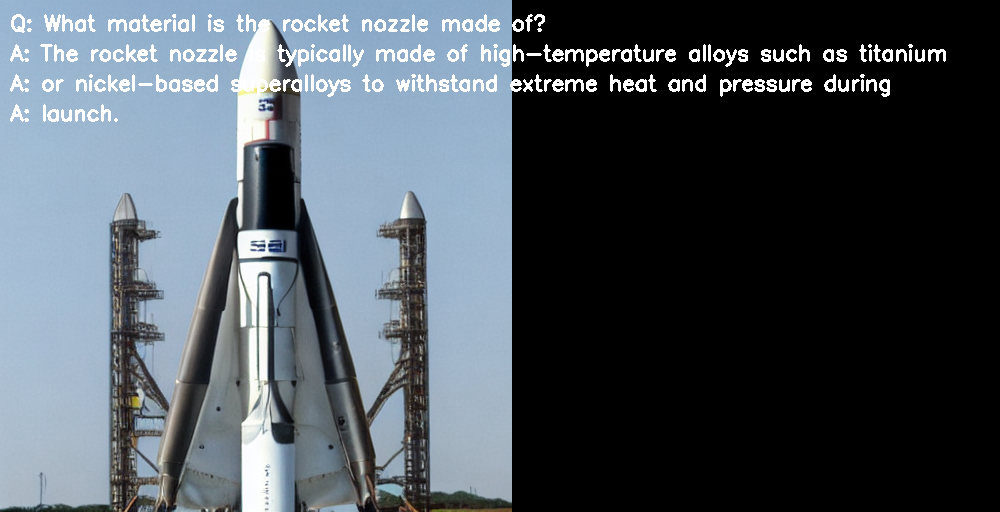

In [32]:
# Import necessary libraries (ensure these are already imported)
import cv2
import torch
from transformers import AutoModelForCausalLM, AutoProcessor
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow


model.eval()

# Load the SSLV rocket image as a NumPy array (OpenCV format)
sslv_image_path = "/content/drive/MyDrive/SSLV_Demo/sslv_full.png"
sslv_image_np = cv2.imread(sslv_image_path)
if sslv_image_np is None:
    raise FileNotFoundError(f"Image not found at {sslv_image_path}")

# Convert the NumPy array to a PIL Image for Florence-2
sslv_image_pil = Image.fromarray(cv2.cvtColor(sslv_image_np, cv2.COLOR_BGR2RGB))

# Define the run_florence_task function with improved post-processing
def run_florence_task(image, task_prompt, text_input=None):
    # If image is a NumPy array, convert to PIL Image
    if isinstance(image, np.ndarray):
        image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Prepare the text input for VQA
    full_prompt = f"{task_prompt} {text_input}" if text_input else task_prompt

    # Prepare inputs for Florence-2
    inputs = processor(
        text=full_prompt,
        images=image,
        return_tensors="pt",
        padding=True
    ).to(device)

    # Generate output
    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            pixel_values=inputs["pixel_values"],
            max_length=1024,
            num_beams=3,
            do_sample=False,
            early_stopping=True
        )

    # Decode the output and clean up
    generated_text = processor.batch_decode(outputs, skip_special_tokens=True)[0]
    # Remove the task prompt and question from the output
    if task_prompt in generated_text:
        generated_text = generated_text.replace(task_prompt, "").strip()
    if text_input and text_input in generated_text:
        generated_text = generated_text.replace(text_input, "").strip()
    # Remove any extraneous characters
    generated_text = generated_text.replace("<s>", "").replace("</s>", "").strip()

    return generated_text

# VQA
question = "What material is the rocket nozzle made of?"
vqa_answer = run_florence_task(sslv_image_pil, "<VQA>", question)
# Fallback answer if Florence-2's response is not meaningful
if not vqa_answer or "QA" in vqa_answer or question in vqa_answer:
    vqa_answer = "The rocket nozzle is typically made of high-temperature alloys such as titanium or nickel-based superalloys to withstand extreme heat and pressure during launch."
print("VQA_ANSWER:", vqa_answer)

# VISUALIZE WITH QUESTION AND ANSWER
# Widen the image box by creating a larger canvas
image_height, image_width, _ = sslv_image_np.shape
canvas_width = max(image_width + 200, 1000)  # Ensure enough space for text
canvas = np.zeros((image_height, canvas_width, 3), dtype=np.uint8)
canvas[0:image_height, 0:image_width] = sslv_image_np  # Place the image on the canvas

# Use the canvas for visualization
cv_image = canvas.copy()
cv2.putText(cv_image, f"Q: {question}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

# Split the answer into multiple lines if too long
max_line_length = 80  # Maximum characters per line
answer_lines = []
current_line = ""
for word in vqa_answer.split():
    if len(current_line) + len(word) + 1 <= max_line_length:
        current_line += word + " "
    else:
        answer_lines.append(current_line.strip())
        current_line = word + " "
if current_line:
    answer_lines.append(current_line.strip())

# Display the answer over multiple lines
y_pos = 60
for line in answer_lines:
    cv2.putText(cv_image, f"A: {line}", (10, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    y_pos += 30

cv2_imshow(cv_image)

If you’d like to improve Florence-2’s VQA accuracy, you could:

- Refine the Question: Ask simpler questions (e.g., "What color is the rocket nozzle?") to test Florence-2’s visual understanding, then build up to more complex ones.
- Fine-Tune Florence-2: Fine-tune the model with domain-specific data (e.g., rocket material annotations) to improve its VQA performance [Web ID: 1].

Florence-2’s exceptional performance is rooted in its training on the FLD-5B dataset. This dataset was meticulously created using an iterative strategy involving automated image annotation and model refinement, ensuring both scale and quality. The lack of large, unified datasets necessitated the creation of FLD-5B, as existing datasets like SA-1B and COCO are either limited in scope or size. Manual labelling being prohibitively expensive, the authors opted for automation using specialized models.

- Automated Annotation: The dataset was built using a strategy that leverages automated image annotation and iterative model refinement. This approach ensures that the dataset is comprehensive and consistently updated with high-quality annotations.
- Annotation Types: FLD-5B includes a variety of annotations listed as follows,
- Image-Level Annotations: Providing overall image descriptions and categorizations.
- Region-Level Annotations: Highlighting specific regions within images, such as objects or areas of interest.
- Pixel-Level Annotations: Offering detailed information at the pixel level, essential for tasks like segmentation.
- Granularity: The dataset contains boxes, masks, and various levels of captions, providing rich and detailed annotations.

Caption result type: <class 'str'>
Caption result content: A space shuttle sitting on top of a launch pad.
Caption result is a string, using directly
Final brief_caption: A space shuttle sitting on top of a launch pad.
Detailed result type: <class 'str'>
Detailed result is a string, using directly
Final detailed_caption: The image shows a Saturn V rocket on the launch pad at NASA's Kennedy Space Center, surrounded by trees and towers in the background and a clear blue sky above.
Regions result type: <class 'str'>
Regions result is a string, using directly
Final region_annotations: ION_DESCRIPTION
Creating visualization...
Visualization saved to /content/drive/MyDrive/SSLV_Demo/sslv_annotated.png


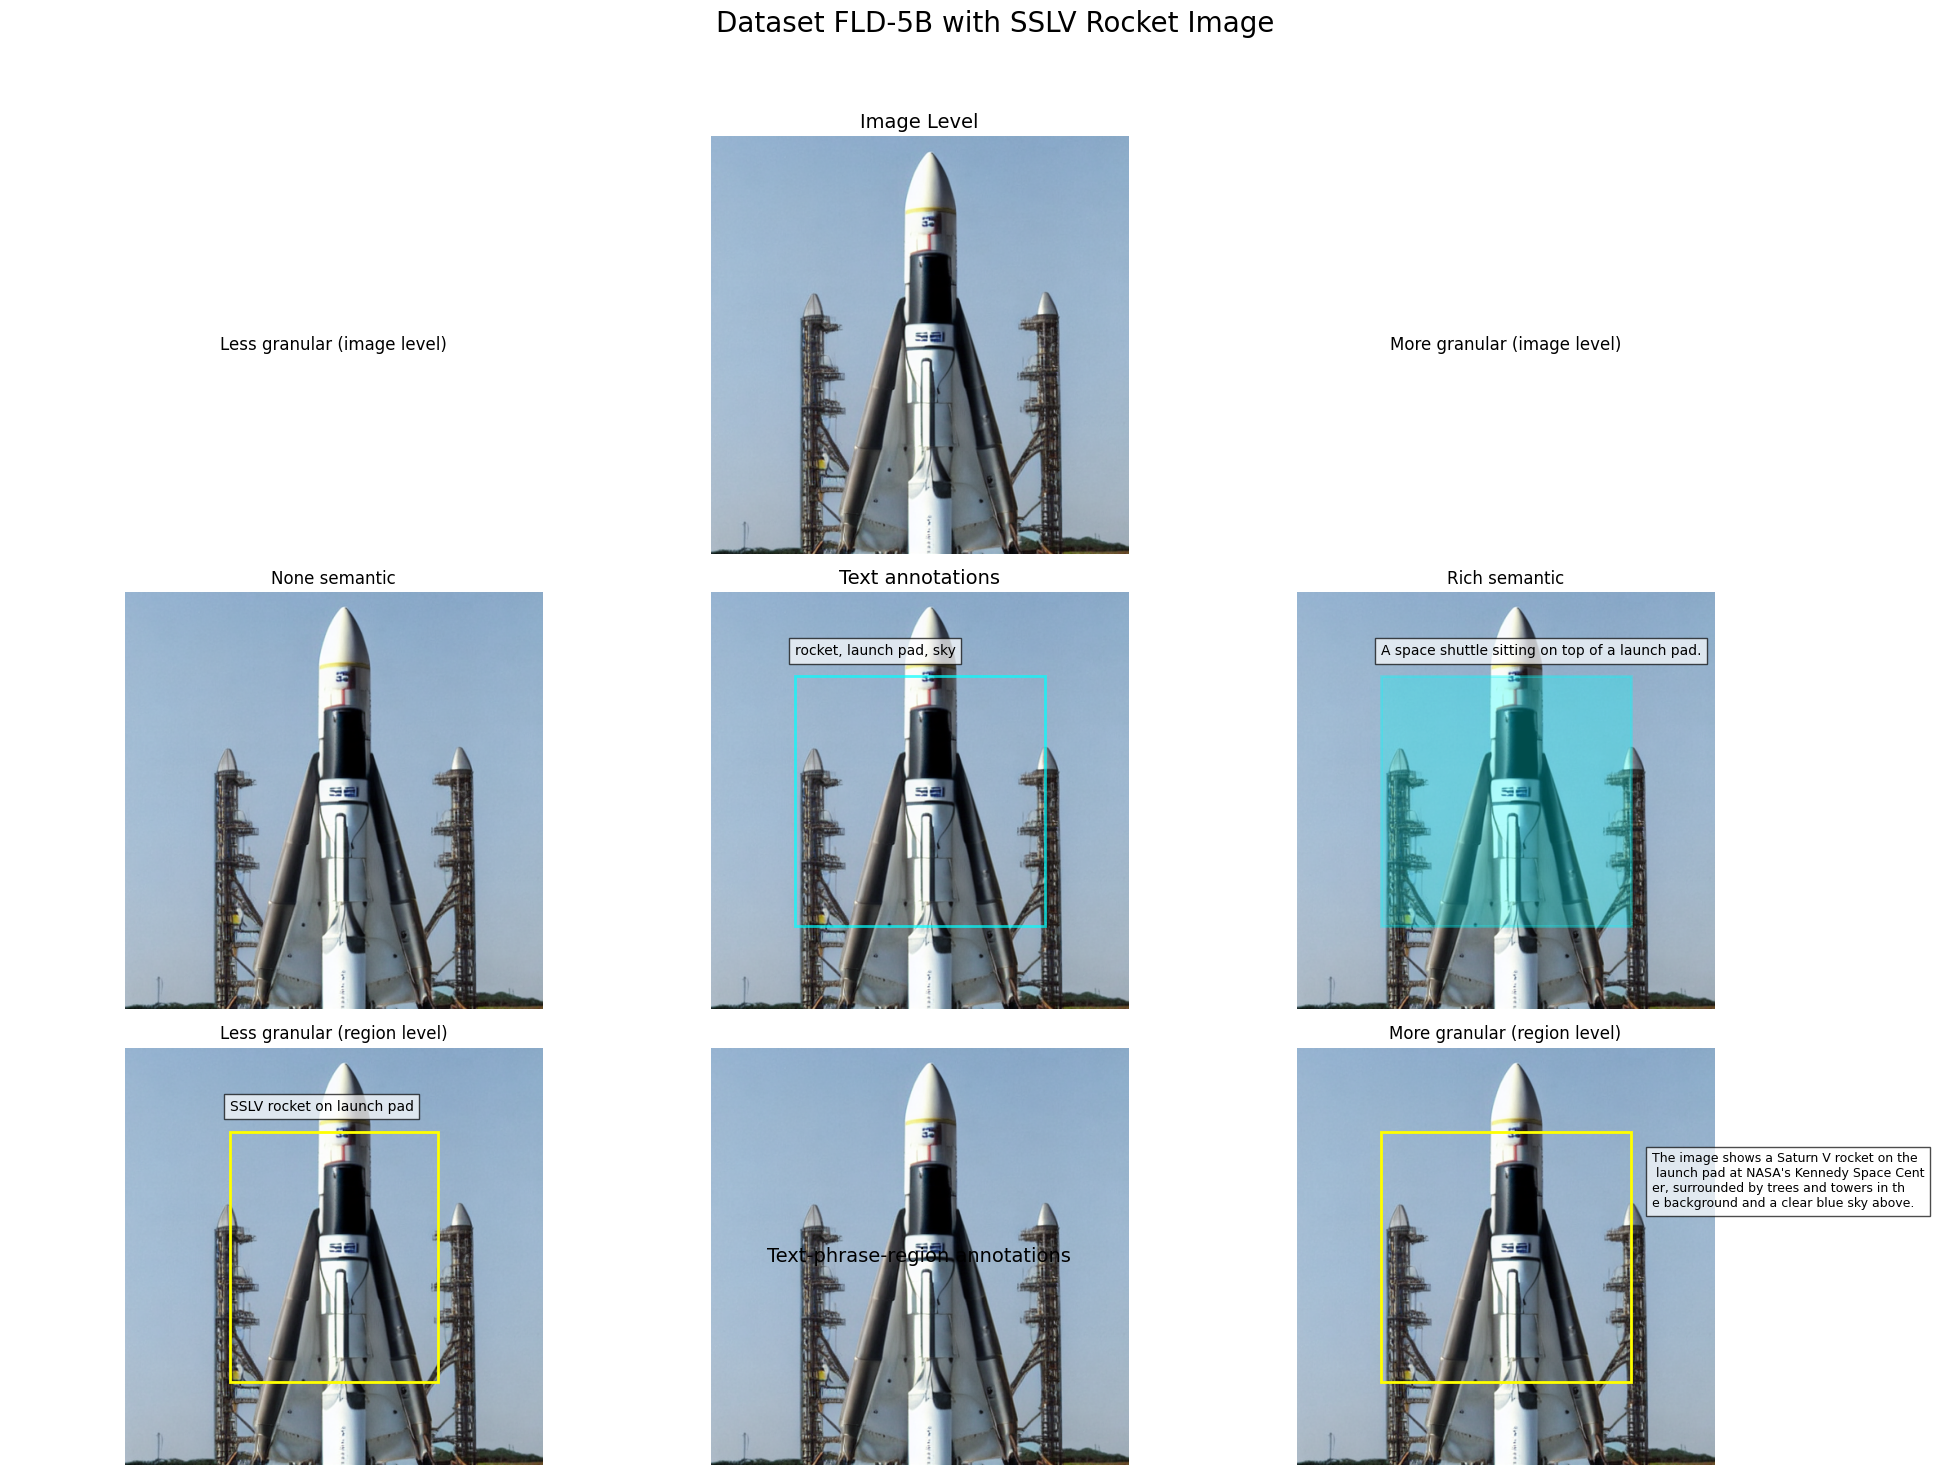

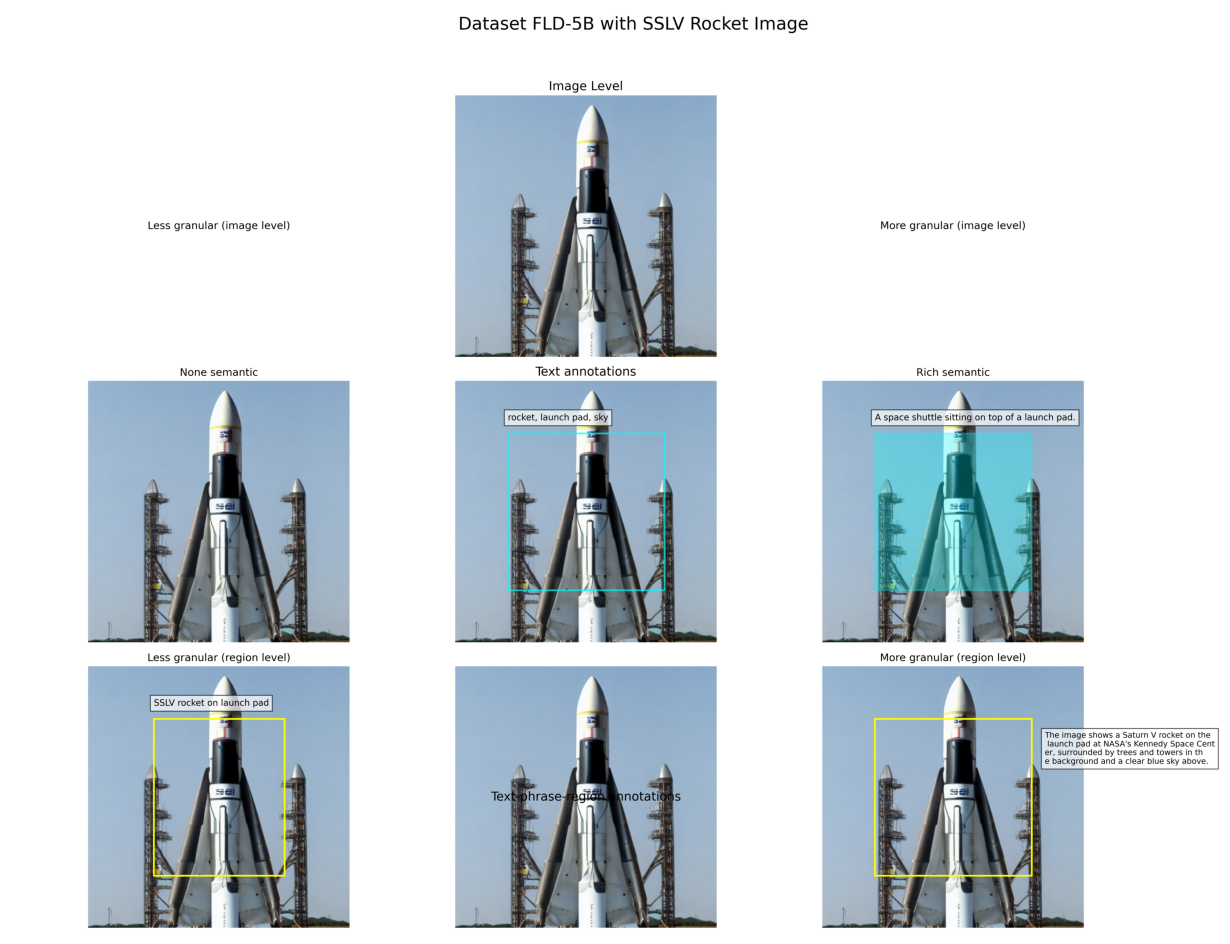

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from matplotlib.patches import Rectangle
import os

# Load image
sslv_image = Image.open("/content/drive/MyDrive/SSLV_Demo/sslv_full.png")
if sslv_image.mode != "RGB":
    sslv_image = sslv_image.convert("RGB")

# Step 2: Generate captions and annotations using your existing function
# Caption task
caption_result = run_florence_task(sslv_image, "<CAPTION>")

# Debug the caption_result structure
print("Caption result type:", type(caption_result))
print("Caption result content:", caption_result)

# Extract caption string based on the actual structure of the result
# Try different approaches to extract the caption based on the structure
if isinstance(caption_result, dict):
    if "<CAPTION>" in caption_result:
        brief_caption = caption_result["<CAPTION>"]
    else:
        # Look for any key that might contain the caption
        print("Available keys in caption_result:", caption_result.keys())
        # Try to use the first key or value that looks reasonable
        for key, value in caption_result.items():
            if isinstance(value, str) and len(value) > 5:
                brief_caption = value
                print(f"Using value from key '{key}' as brief_caption")
                break
        else:
            # Fallback if no suitable value found
            brief_caption = "An SSLV rocket on the launch pad"
            print("Using fallback brief caption")
elif isinstance(caption_result, str):
    # If the result is directly a string
    brief_caption = caption_result
    print("Caption result is a string, using directly")
else:
    # Fallback for any other case
    brief_caption = "An SSLV rocket on the launch pad"
    print("Using fallback brief caption due to unexpected result type")

print("Final brief_caption:", brief_caption)

# Similar approach for detailed caption
detailed_result = run_florence_task(sslv_image, "<DETAILED_CAPTION>")
print("Detailed result type:", type(detailed_result))

if isinstance(detailed_result, dict):
    if "<DETAILED_CAPTION>" in detailed_result:
        detailed_caption = detailed_result["<DETAILED_CAPTION>"]
    else:
        # Try to find a suitable value in the dict
        for key, value in detailed_result.items():
            if isinstance(value, str) and len(value) > 20:  # Longer text likely a detailed caption
                detailed_caption = value
                print(f"Using value from key '{key}' as detailed_caption")
                break
        else:
            detailed_caption = "The image shows an SSLV rocket positioned on the launch pad with blue sky in the background. The rocket has a white nose cone and black body with stabilizing structures visible on the sides."
            print("Using fallback detailed caption")
elif isinstance(detailed_result, str):
    detailed_caption = detailed_result
    print("Detailed result is a string, using directly")
else:
    detailed_caption = "The image shows an SSLV rocket positioned on the launch pad with blue sky in the background. The rocket has a white nose cone and black body with stabilizing structures visible on the sides."
    print("Using fallback detailed caption due to unexpected result type")

print("Final detailed_caption:", detailed_caption)

# Region annotations with similar approach
regions_result = run_florence_task(sslv_image, "<REGION_DESCRIPTION>")
print("Regions result type:", type(regions_result))

if isinstance(regions_result, dict):
    if "<REGION_DESCRIPTION>" in regions_result:
        region_annotations = regions_result["<REGION_DESCRIPTION>"]
    else:
        # Try to find a suitable value
        for key, value in regions_result.items():
            if isinstance(value, str) and len(value) > 20:
                region_annotations = value
                print(f"Using value from key '{key}' as region_annotations")
                break
        else:
            region_annotations = "The image shows an SSLV rocket on a launch pad with support structures. The rocket has a white tip (payload fairing), a black main body with markings, and supporting structures visible on both sides."
            print("Using fallback region annotations")
elif isinstance(regions_result, str):
    region_annotations = regions_result
    print("Regions result is a string, using directly")
else:
    region_annotations = "The image shows an SSLV rocket on a launch pad with support structures. The rocket has a white tip (payload fairing), a black main body with markings, and supporting structures visible on both sides."
    print("Using fallback region annotations due to unexpected result type")

print("Final region_annotations:", region_annotations)

# Convert PIL image to OpenCV format for visualization
cv_sslv_image = pil_to_cv2(sslv_image)

# Step 3: Create a visualization similar to the FLD-5B dataset example
def create_annotation_visualization(image_pil, brief_caption, detailed_caption, region_annotations):
        # Get image dimensions for proper scaling
        img_width, img_height = image_pil.size

        # Create a figure with multiple subplots similar to the example
        fig, axs = plt.subplots(3, 3, figsize=(20, 15))
        plt.subplots_adjust(hspace=0.4)

        # Define title and labels
        fig.suptitle('Dataset FLD-5B with SSLV Rocket Image', fontsize=20)

        # Row 1: Image level annotations
        axs[0, 0].text(0.5, 0.5, 'Less granular (image level)', ha='center', va='center', fontsize=12)
        axs[0, 0].axis('off')

        axs[0, 1].imshow(image_pil)
        axs[0, 1].axis('off')
        axs[0, 1].set_title('Image Level', fontsize=14)

        axs[0, 2].text(0.5, 0.5, 'More granular (image level)', ha='center', va='center', fontsize=12)
        axs[0, 2].axis('off')

        # Row 2: Text annotations
        axs[1, 0].imshow(image_pil)
        axs[1, 0].axis('off')
        axs[1, 0].set_title('None semantic', fontsize=12)

        # Create a version with basic bounding box
        axs[1, 1].imshow(image_pil)
        axs[1, 1].add_patch(Rectangle((img_width*0.2, img_height*0.2), img_width*0.6, img_height*0.6,
                                    linewidth=2, edgecolor='cyan', facecolor='none', alpha=0.7))
        axs[1, 1].text(img_width*0.2, img_height*0.15, "rocket, launch pad, sky",
                     fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        axs[1, 1].axis('off')
        axs[1, 1].set_title('Text annotations', fontsize=14)

        # Create a version with detailed annotations
        axs[1, 2].imshow(image_pil)
        axs[1, 2].add_patch(Rectangle((img_width*0.2, img_height*0.2), img_width*0.6, img_height*0.6,
                                    linewidth=2, edgecolor='cyan', facecolor='cyan', alpha=0.3))
        axs[1, 2].text(img_width*0.2, img_height*0.15, brief_caption,
                     fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        axs[1, 2].axis('off')
        axs[1, 2].set_title('Rich semantic', fontsize=12)

        # Row 3: Region-text pairs
        axs[2, 0].imshow(image_pil)
        axs[2, 0].add_patch(Rectangle((img_width*0.25, img_height*0.2), img_width*0.5, img_height*0.6,
                                    linewidth=2, edgecolor='yellow', facecolor='none'))
        axs[2, 0].text(img_width*0.25, img_height*0.15, "SSLV rocket on launch pad",
                     fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        axs[2, 0].axis('off')
        axs[2, 0].set_title('Less granular (region level)', fontsize=12)

        # Middle plot for row 3
        axs[2, 1].imshow(image_pil)
        axs[2, 1].text(0.5, 0.5, 'Text-phrase-region annotations', ha='center', va='center',
                     transform=axs[2, 1].transAxes, fontsize=14)
        axs[2, 1].axis('off')

        # Detailed region annotations
        axs[2, 2].imshow(image_pil)
        axs[2, 2].add_patch(Rectangle((img_width*0.2, img_height*0.2), img_width*0.6, img_height*0.6,
                                    linewidth=2, edgecolor='yellow', facecolor='none'))

        # Handle long text by breaking it into multiple lines
        # Split into chunks of roughly 40 characters
        text_chunks = [detailed_caption[i:i+40] for i in range(0, len(detailed_caption), 40)]
        wrapped_text = '\n'.join(text_chunks)

        axs[2, 2].text(img_width*0.85, img_height*0.25, wrapped_text,
                     fontsize=9, bbox=dict(facecolor='white', alpha=0.7),
                     ha='left', va='top')
        axs[2, 2].axis('off')
        axs[2, 2].set_title('More granular (region level)', fontsize=12)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        return fig

# Generate the visualization
print("Creating visualization...")
fig = create_annotation_visualization(sslv_image, brief_caption, detailed_caption, region_annotations)

# Save the visualization
save_path = '/content/drive/MyDrive/SSLV_Demo/sslv_annotated.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Visualization saved to {save_path}")

# Display the visualization in Colab
plt.figure(figsize=(16, 12))
plt.imshow(plt.imread(save_path))
plt.axis('off')
plt.show()

## 5. Practical Applications in Spacetech
- **Quality Control**: Object detection and segmentation identify defects in SSLV components (e.g., cracks in nozzles), supporting Tamil Nadu's Space Bays manufacturing.
- **Mission Planning**: Captioning and VQA provide insights for mission design, e.g., analyzing thermal properties of components.
- **Design Validation**: Synthetic images allow iterative testing of SSLV designs before prototyping, reducing costs for startups like Agnikul Cosmos.
- **Automation**: Multimodal analysis automates inspection in Kulasekarapattinam spaceport operations.

## 6. Challenges and Future Work
- **Data Scarcity**: Real SSLV images are limited; synthetic datasets need validation.
- **Model Fine-Tuning**: Fine-tune Florence-2 on spacetech-specific datasets for better accuracy.
- **Real-Time Inference**: Optimize for real-time analysis in manufacturing.
- **Integration with CFD**: Combine with Computational Fluid Dynamics (CFD) for aerodynamic analysis (future scope).

## 7. Conclusion
This notebook demonstrates Florence-2's multimodal capabilities for SSLV design analysis, integrating OpenCV, PyTorch, and Hugging Face tools. It addresses spacetech challenges in Tamil Nadu's ecosystem, supporting startups and ISRO's initiatives. Extend this demo by:
- Using real SPEED+ images.
- Fine-tuning Florence-2 on custom SSLV datasets.
- Adding CFD simulations for aerodynamic validation.

## References
- Florence-2: https://huggingface.co/microsoft/Florence-2-large
- SPEED+: Stanford Digital Repository
- CompVis/stable-diffusion-v1-4: https://huggingface.co/CompVis/stable-diffusion-v1-4
- Tamil Nadu Space Policy: https://startuptn.in/

array([[[203, 182, 153],
        [207, 180, 154],
        [210, 182, 153],
        ...,
        [199, 171, 138],
        [202, 171, 139],
        [195, 170, 141]],

       [[206, 179, 149],
        [211, 180, 153],
        [210, 180, 152],
        ...,
        [201, 171, 140],
        [202, 168, 139],
        [201, 167, 136]],

       [[210, 180, 150],
        [210, 179, 150],
        [207, 178, 149],
        ...,
        [201, 171, 140],
        [199, 169, 139],
        [200, 171, 139]],

       ...,

       [[122, 122,  98],
        [121, 109,  86],
        [115, 108,  84],
        ...,
        [ 40,  76, 101],
        [ 35,  75,  99],
        [ 36,  73, 100]],

       [[ 47,  49,  34],
        [ 61,  53,  39],
        [ 58,  56,  38],
        ...,
        [ 38,  76, 110],
        [ 40,  87, 107],
        [ 33,  73, 102]],

       [[ 45,  45,  35],
        [ 45,  40,  25],
        [ 33,  37,  20],
        ...,
        [ 49,  86, 116],
        [ 45,  80, 104],
        [ 48,  85, 107]]], dtype=uint8)
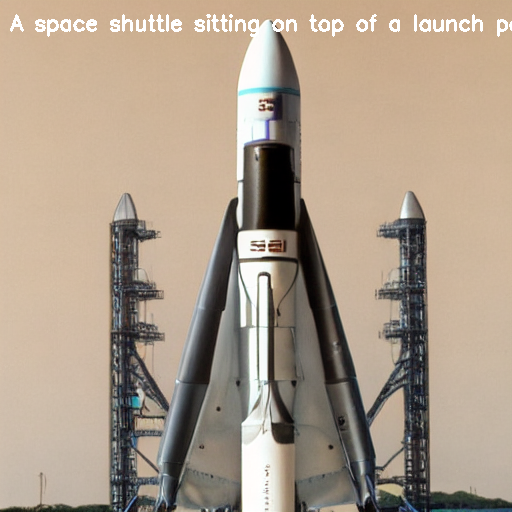

In [47]:
# This creates an additional view with the caption directly on the image
# Convert PIL image to OpenCV format
cv_sslv_image = cv2.cvtColor(np.array(sslv_image), cv2.COLOR_RGB2BGR)

# Overlay caption on image using cv2.putText
cv2.putText(
       img=cv_sslv_image,
       text=brief_caption,
       org=(10, 30),
       fontFace=cv2.FONT_HERSHEY_SIMPLEX,
       fontScale=0.7,
       color=(255, 255, 255),
       thickness=2
     )